In [18]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [19]:
mlp = pd.read_csv('heart_failure_clinical_records_dataset.csv')
mlp

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [20]:
mlp.drop(['sex'], axis=1, inplace=True)
mlp

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,280,0


In [21]:
df = pd.DataFrame(mlp)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,280,0


In [22]:
x = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3)
x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time
11,62.0,0,231,0,25,1,253000.0,0.9,140,1,10
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,126
158,85.0,1,910,0,50,0,235000.0,1.3,134,0,121
280,70.0,0,2695,1,40,0,241000.0,1.0,137,0,247
173,50.0,1,115,0,20,0,189000.0,0.8,139,0,146
...,...,...,...,...,...,...,...,...,...,...,...
32,50.0,1,249,1,35,1,319000.0,1.0,128,0,28
99,63.0,1,61,1,40,0,221000.0,1.1,140,0,86
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,66
15,82.0,1,379,0,50,0,47000.0,1.3,136,0,13


In [33]:
my_mlp = MLPClassifier(hidden_layer_sizes=20, max_iter=4, alpha=1e-4)


In [34]:
my_mlp.fit(x_train, y_train)
my_mlp

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=20, max_iter=4)

In [35]:
y_pred = my_mlp.predict(x_test)

In [36]:
y_pred == y_test

11      True
163     True
158    False
280    False
173    False
       ...  
32      True
99     False
68      True
15      True
298    False
Name: DEATH_EVENT, Length: 90, dtype: bool

In [37]:
confusion_matrix(y_test, y_pred)

array([[ 0, 56],
       [ 0, 34]], dtype=int64)

In [38]:
my_mlp.score(x_train, y_train)

0.2966507177033493

In [39]:
my_mlp.score(x_test, y_test)

0.37777777777777777

In [40]:
score = cross_val_score(my_mlp, x, y, cv=3)
score.mean()


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6721885521885523

In [42]:
import matplotlib.pylab as plt

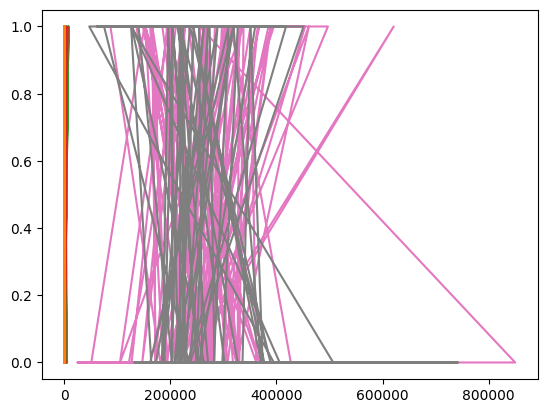

In [44]:
plt.plot(x_train, y_train, label='Train Accuracy')
plt.plot(x_test, y_test, label='Test Accuracy')

plt.show()